**Explorative Datenanalyse (EDA)**

In diesem Notebook werden die extrahierten und bereinigten Finanz- sowie Tweet-Daten der Deutschen-Bank-Aktie mit geeigneten Visualisierungen dargestellt. Ziel ist es, ein tieferes Verständnis der Daten zu gewinnen und verborgene Zusammenhänge aufzudecken. Hierfür werden verschiedene Methodiken der technischen Finanzanalyse angewendet.

In [396]:
#Importe
import re 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Daten Einlesen
df_tweets = pd.read_csv('df_tweets_cleaned.csv')
df_kpi = pd.read_csv('df_kpi_cleaned.csv')

In [397]:
df_tweets.head()

,username,time,body_cleaned
0,shortvolumes,2023-08-06 04:41:00,Short sale volume (not short interest) for on ...
1,NewAge69,2023-08-07 13:57:00,feels good to stay on higher levels
2,macroaxis,2023-08-08 09:30:00,Is Healthcare better investment than Deutsche ...
3,STCKPRO,2023-08-08 10:24:00,NEW ARTICLE Deutsche Bank It Is Now Time For S...
4,stockilluminati,2023-08-08 10:25:00,stockilluminati.com/db/news... Deutsche Bank I...


In [398]:
df_kpi.head()

,Datetime,Shs Outstand,Perf Week_%,Shs Float,Short Interest,Target Price,Rel Volume,Prev Close,Shortable,Avg Volume,Price,Recom,Volume,Change_%,Date,Month,Weekday,Year
0,2023-08-06 12:51:28,2.080000e+09,-0.81,1.880000e+09,13290000,12.02,0.60,10.96,Yes,2620000,11.02,4.0,1573588,0.55,2023-08-06,8,Sunday,2023
1,2023-08-07 18:53:34,2.080000e+09,-0.49,1.880000e+09,13290000,12.02,0.47,11.02,Yes,2520000,11.07,4.0,1602224,0.50,2023-08-07,8,Monday,2023
2,2023-08-08 19:22:16,2.080000e+09,-0.55,1.880000e+09,13290000,12.02,0.51,9.80,Yes,2500000,9.72,4.0,2680200,0.49,2023-08-08,8,Tuesday,2023
3,2023-08-09 21:03:29,2.080000e+09,1.12,1.880000e+09,13290000,12.02,0.61,10.75,Yes,2480000,10.85,4.0,1245519,0.93,2023-08-09,8,Wednesday,2023
4,2023-08-10 21:15:37,2.080000e+09,0.18,1.880000e+09,13290000,12.02,0.75,10.82,Yes,2490000,10.98,4.0,1588257,1.48,2023-08-10,8,Thursday,2023


## Attributerklärungen

| **Attribut**       | **Erklärung**                                                                 |
|---------------------|----------------------------------------------------------------------------------|
| **Date**           | Date-time Attribut mit Datum und Uhrzeit.                                       |
| **Shs Outstand**   | „Shares Outstand“: Ausstehende Aktien, die von Anteilseignern gehalten werden. |
| **Perf Week_%**      | Performance (Week): Prozentuale Veränderung des Aktienkurses in der letzten Woche (positiv/negativ). |
| **Shs Float**      | Shares Float: Anzahl an Aktien, die gehandelt werden können und für den Kauf verfügbar sind. |
| **Short Interest** | Anzahl an gehaltenen Aktien in Short-Positionen.                                |
| **Target Price**   | Von Analysten geschätzter zukünftiger Preis einer Aktie.                         |
| **Rel Volume**     | Relatives Handelsvolumen im Vergleich zum durchschnittlichen Handelsvolumen der letzten 3 Monate. |
| **Prev Close**     | Schlusskurs einer Aktie vom vorherigen Handelstag.                              |
| **Shortable**      | Yes: Aktie kann leerverkauft werden; No: Aktie nicht leerverkaufbar.             |
| **Avg Volume**     | Durchschnittliches tägliches Handelsvolumen einer Aktie über die letzten 3 Monate. |
| **Price**          | Aktueller Aktienpreis beim Aufruf.                                              |
| **Recom**          | Recommendation: Durchschnittliche Analystenbewertung (1 = Buy; 5 = Sell).      |
| **Volume**         | Gesamtmenge der gehandelten Verträge (Aktien, Währungslose oder Futures).        |
| **Change_%**         | Prozentualer Unterschied zwischen aktuellem und vorherigem Schlusskurs.         |
| **username**       | Benutzername des Verfassers.                                                   |
| **time**           | Zeitpunkt des Tweets (Datum und Uhrzeit).                                      |
| **body_cleaned**           | Inhalt des Tweets.                                                             |

In [399]:
df_kpi[['Price', 'Prev Close']].describe()

,Price,Prev Close
count,86.000000,86.000000
mean,10.699302,10.695233
std,0.277322,0.271989
min,9.720000,9.800000
25%,10.577500,10.577500
50%,10.720000,10.720000
75%,10.930000,10.922500
max,11.150000,11.170000


An erster Stelle ist es spannend sich die Preisstatistiken anzusehen. Da Price und Prev Close fast gleich 
sind konzentriere ich mich hier auf den Preis, der während des Scraping-Vorgangs (ca. 22 Uhr) 
gemessen wurde. Dieser hat den Minimums Wert von 9,72 Euro und den Maximums Wert von 11,15 
Euro. Der durchschnittliche Preis befindet sich bei 10,7 Euro. 

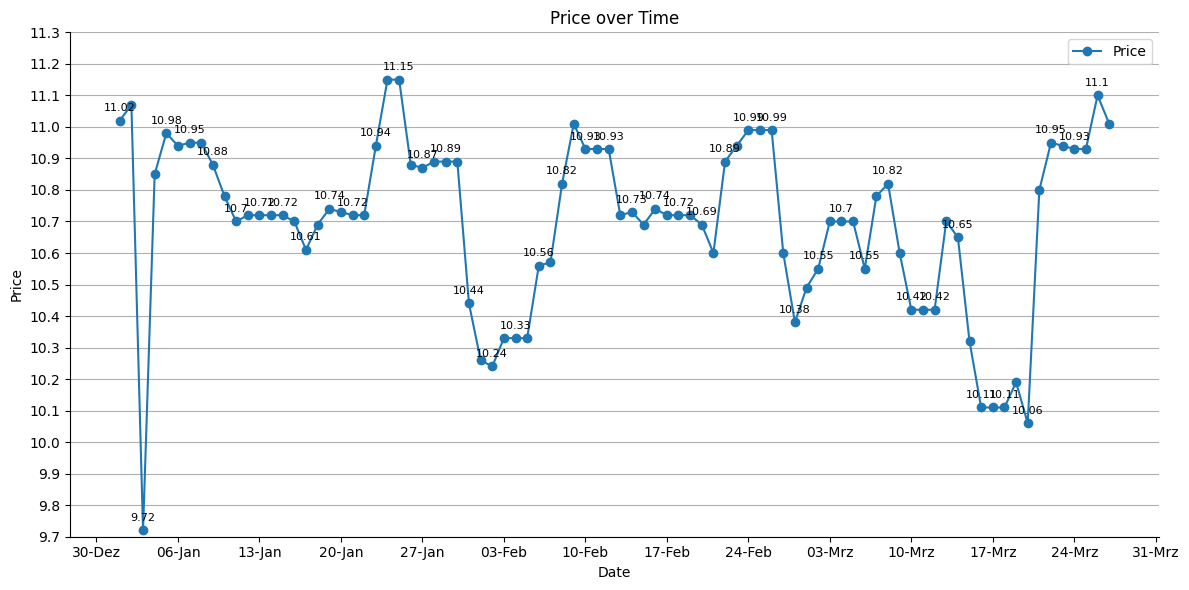

In [ ]:
# Plot erstellen
plt.figure(figsize=(12, 6))

# Plot
plt.plot(df_kpi['Date'], df_kpi['Price'], marker='o', linestyle='-', label='Price')

# Gitter: Nur horizontale Linien
plt.grid(axis='y')

# Entfernen der oberen und rechten Ränder
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Achsentitel und Diagrammtitel
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')

# Y-Achse erweitern mit kleinen Schritten von 9.7 bis 11.3
plt.ylim(9.7, 11.3)
plt.yticks([x * 0.1 for x in range(97, 114)])  # Schritte von 0.1 auf der Y-Achse

# Datum auf der x-Achse formatieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Wöchentliches Intervall

# Werte auf den Datenpunkten anzeigen, leicht über den Punkten platzieren
for i in range(len(df_kpi)):
    if i % 2 == 0:  # Beschriftung nur auf jedem zweiten Punkt
        plt.text(df_kpi['Date'].iloc[i], df_kpi['Price'].iloc[i] + 0.03,  # Wert leicht nach oben schieben
                 str(round(df_kpi['Price'].iloc[i], 2)), 
                 fontsize=8, ha='center')  

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.tight_layout()
plt.show()


Bei der Visualisierung des Aktienpreises ist zu erkennen das der Kurs 
normalerweise im Bereich von 10,30 bis 10,90 Euro auf und abschwingt. Es gibt einzelne Fälle, in denen 
die Aktie über die 11 Euro Marke geht und auch Fälle in der die Aktie unter die 10,30 Marke geht, mit 
einem Ausreißer bei 9,72 Euro.

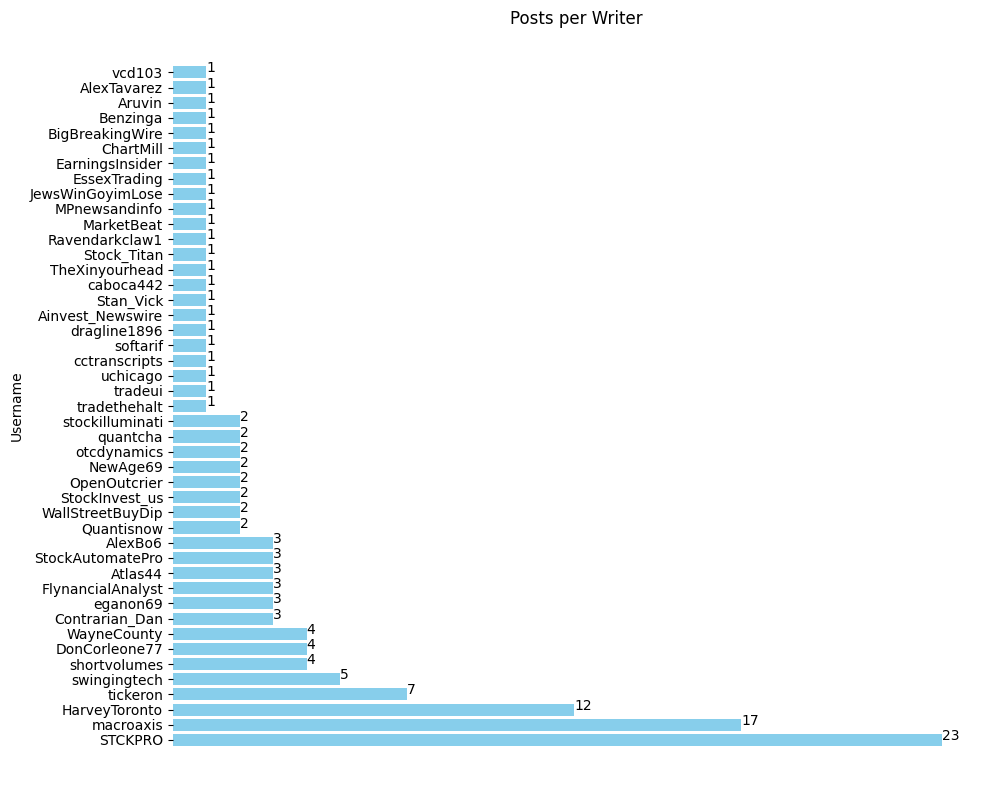

In [ ]:
# Posts pro Benutzer zählen
posts_per_writer = df_tweets.groupby('username').size().reset_index(name='Count')

# Nach der Anzahl der Posts sortieren
posts_per_writer = posts_per_writer.sort_values(by='Count', ascending=False)

# Plot erstellen
plt.figure(figsize=(10, 8))
plt.barh(posts_per_writer['username'], posts_per_writer['Count'], color='skyblue')

# Achsentitel und Diagrammtitel 
plt.ylabel('Username')
plt.title('Posts per Writer')

# Werte auf den Balken 
for index, value in enumerate(posts_per_writer['Count']):
    plt.text(value, index, str(value))

# Entfernen des gesamten Rahmens
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X-Achse komplett ausblenden
ax.get_xaxis().set_visible(False)

# Plot anzeigen
plt.tight_layout()
plt.show()

An dieser Visualisierung kann man erkennen, dass STCKPRO mit 23 Beiträgen insgesamt auf Platz eins 
steht, macroaxis mit 17 Beiträgen auf dem zweiten Platz, gefolgt von HarveyToronto mit 12 Posts 
insgesamt. Die restlichen Posts pro User sind vor allem im Bereich von 1-4 Beiträgen. Es gibt also vor 
allem drei aktive User, wobei stark aktive User auch Bots sein könnten.

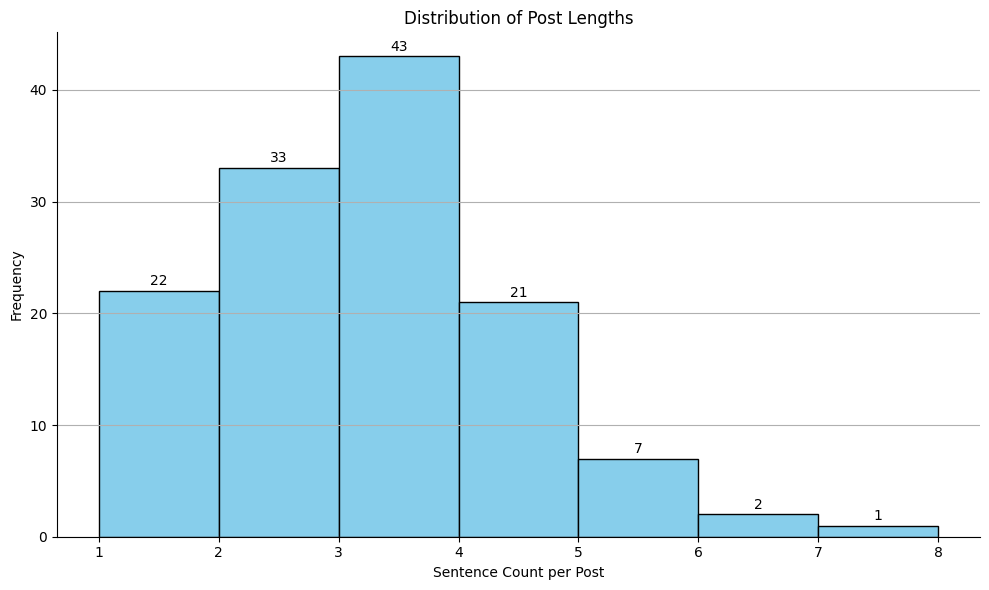

In [ ]:
# Funktion, um die Anzahl der Tokens basierend auf den Satzzeichen . ? ! zu zählen
def count_tokens(text):
    if isinstance(text, str):
        tokens = [token for token in re.split(r'[.!?]', text) if token.strip()]
        return len(tokens) if tokens else 1
    else:
        return 0

# Erstellung neuer Spalte 'token_number', die die Anzahl der Tokens für jeden Beitrag enthält
df_tweets['token_number'] = df_tweets['body_cleaned'].apply(count_tokens)

# Histogramm
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_tweets['token_number'], bins=range(1, df_tweets['token_number'].max() + 2), color='skyblue', edgecolor='black')

# Achsentitel und Diagrammtitel
plt.xlabel('Sentence Count per Post')
plt.ylabel('Frequency')
plt.title('Distribution of Post Lengths')

# Oberen und rechten Rahmen entfernen
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Nur horizontale Gitterlinien anzeigen
plt.grid(axis='y')

# Werte über den Balken mittig anzeigen
for count, x in zip(counts, bins[:-1]):
    plt.text(x + 0.5, count + 0.5, str(int(count)), ha='center')

# Plot anzeigen
plt.tight_layout()
plt.show()

Sieht man sich die Beitragslängen an ist zu erkennen, dass auf dem ersten Platz 
Beiträge mit nur drei Sätzen sind, auf Platz zwei Beiträge mit zwei Sätzen und auf Platz drei 
Beiträge mit ein oder vier Sätzen. Fünf Sätze sind mit der Anzahl von 7 eher seltener. Auf Platz drei habe ich ein 
oder vier Sätze zusammen genommen da einzelne Sätze 22 mal auftreten und 4 Sätze 21 mal, beide also relativ 
oft vorkommen. 7 Beiträge kommt beispielweise nur einmal vor und 6 Beiträge 
nur 2 mal.


Diese Visualisierung verdeutlicht, dass Social Media Beiträge auf Seiten wie Twitter oder in diesem Fall 
Stocktwits, tendenziell sehr kurz gehalten werden. 

An dieser Stelle ist es spannend sich die Sätze näher anzusehen.

In [403]:
# DataFrame nach 'token_number' == 1 filtern
df_sentence_length_one = df_tweets[df_tweets['token_number'] == 1].head(10)

# Erste 10 Einträge mit Satzlänge 1 anzeigen
df_sentence_length_one[['body_cleaned', 'token_number']]

,body_cleaned,token_number
1,feels good to stay on higher levels,1
12,wild,1
13,never recovered since 2018,1
14,kraut's are crooks,1
22,up up,1
39,Call the press DB is UP At least for now,1
44,crooks give me 10 bucks,1
50,Short interest in ticks up from very low level...,1
56,Overhead supply,1
62,Burn it down,1


Die Sätze werden zwar kurz gehalten, wie auf dem Schaubild erkennbar, diese sind aber trotzdem 
aussagekräftig und lassen ein allgemeines Stimmungsbild ablesen. Viele davon deuten auf einen 
Kursanstieg und eine positive Markstimmung. Beispiele sind dafür „up up“, „wild“ und „feels good to stay on higher levels“. 

In [404]:
df_sentence_length_eight_or_less_sorted = df_tweets[df_tweets['token_number'] <= 8].sort_values(by='token_number', ascending=False).head(10)

df_sentence_length_eight_or_less_sorted[['body_cleaned', 'token_number']]

,body_cleaned,token_number
90,LONG today at .90 with 1st Upside Target Price...,7
114,updates FY 2023 guidance to EPS and revenue gu...,6
117,Deutsche Bank sees 2023 revenue around EUR 29B...,6
132,Big Breaking JPMorgan equity strategists have ...,5
7,AGNC Investment vs. Deutsche Bank AG ( ). Next...,5
20,Hmmm Im not convinced. Their power & influence...,5
46,the pace of cash flow return to shareholders g...,5
69,has bought back 18m shares sofar. we need at l...,5
54,Deutsche Bank Aktiengesellschaft downgraded by...,5
128,Stock is looking strong and set to rise based ...,5


Längere Sätze geben oft Informationen zu Ereignissen wieder wie Beispielweise „(…) Deutsche Bank delivered yearonyear revenue growth of 6% in the first nine months of 2023 and a compound annual growth rate over 2021 of 6.9% (…)“. 

Allgemein sind längere Sätze informativer. Hier könnte das Stimmungsbild aber schwerer abzulesen 
sein, da nicht direkt die Meinung von „up“ oder „down“ gepostet wird, sondern Informationen oft 
neutraler formuliert werden.

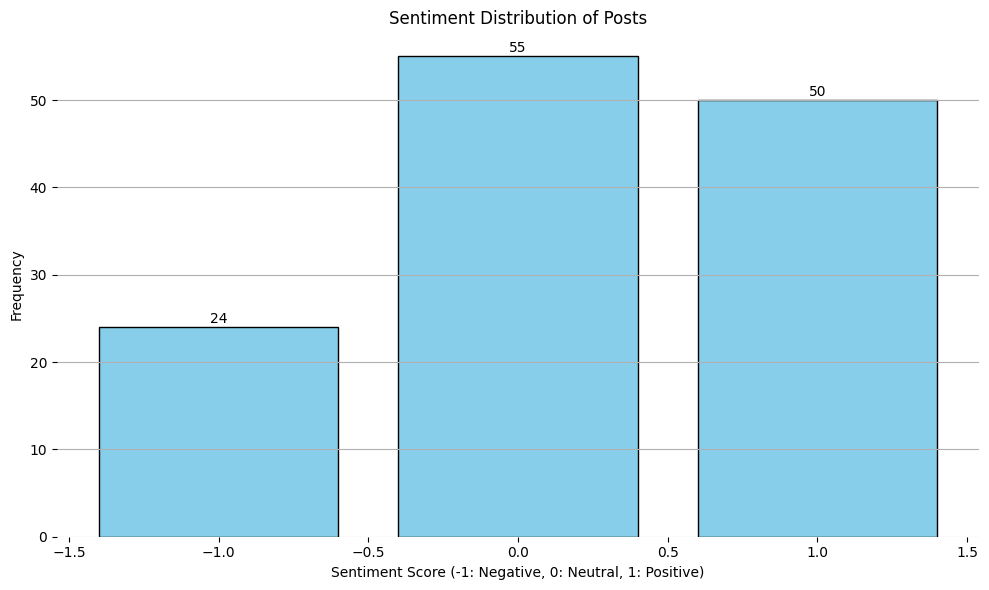

In [ ]:
# VADER-Sentiment-Analyzer
analyzer = SentimentIntensityAnalyzer()

# Funktion, für Sentiment-Score 
def vader_score(text):
    if isinstance(text, str):  # Nur fortfahren, wenn der Text ein String ist
        score = analyzer.polarity_scores(text)
        if score['compound'] >= 0.05:
            return 1  # Positiv
        elif score['compound'] <= -0.05:
            return -1  # Negativ
        else:
            return 0  # Neutral
    return None  # Rückgabe von None für nicht-String-Werte (z.B. NaN)

# VADER-Score für die 'body_cleaned' Spalte berechnen
df_tweets['vader_score'] = df_tweets['body_cleaned'].apply(vader_score)

# Zeilen entfernen, die keine Sentiment-Analyse erhalten (NaN-Werte)
df_tweets = df_tweets.dropna(subset=['vader_score'])

# Anzahl der Beiträge für jede Sentiment-Kategorie zählen
sentiment_counts = df_tweets['vader_score'].value_counts()

# Werte sortieren, für Reihenfolge (-1, 0, 1)
sentiment_counts = sentiment_counts.reindex([-1, 0, 1], fill_value=0)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue', edgecolor='black')

# Achsenbeschriftungen 
plt.xlabel('Sentiment Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Posts')

# Rahmen entfernen
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Gitterlinien nur horizontal anzeigen
plt.grid(axis='y')

# Werte über den Balken mittig anzeigen
for i, value in enumerate(sentiment_counts.values):
    plt.text(i - 1, value + 0.5, str(value), ha='center')

# Plot anzeigen
plt.tight_layout()
plt.show()

An dieser Stelle ist es spannend sich die Sentiment-Scores näher anzusehen. Hier speziell ermittelt 
durch das Modell VADER. Ganze 50 Beiträge werden als positiv eingestuft, während nur 24 als negativ 
eingestuft werden und 55 als neutral. Daraus lässt sich ableiten das in dem dreimonatigen Zeitraum 
wohl vor allem gerne positiv über die Deutsche Bank Aktie gepostet wurde bzw. neutral also informativ. 

C:\Users\Elvan\AppData\Local\Temp\ipykernel_1068\914769836.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_month = df_filtered.groupby(['month', 'vader_score']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

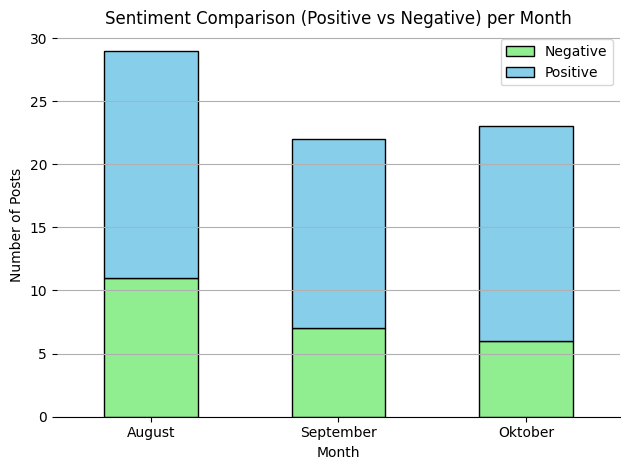

In [ ]:
# Sicherstellen, dass 'time' als datetime-Objekt formatiert ist
df_tweets['time'] = pd.to_datetime(df_tweets['time'])

# Monat als Monatsnamen extrahieren (z.B. Januar, Februar)
df_tweets['month'] = df_tweets['time'].dt.strftime('%B')

# Reihenfolge basierend auf den tatsächlich vorhandenen Monaten im Datensatz
unique_months = pd.Categorical(df_tweets['month'], categories=df_tweets['month'].unique(), ordered=True)

# 'month'-Spalte als kategorische Spalte setzen mit der Reihenfolge der vorhandenen Monate
df_tweets['month'] = pd.Categorical(df_tweets['month'], categories=unique_months.categories, ordered=True)

# Positiven (1) und negativen (-1) Sentiment-Scores filtern
df_filtered = df_tweets[df_tweets['vader_score'].isin([1, -1])]

# Monat und Sentiment-Score gruppieren und Beiträge zählen
sentiment_by_month = df_filtered.groupby(['month', 'vader_score']).size().unstack(fill_value=0)

# Spalten umbenennen
sentiment_by_month.columns = ['Negative', 'Positive']

# Visualisierung der summierten positiven und negativen Scores je Monat
plt.figure(figsize=(10, 6))
sentiment_by_month.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue'], edgecolor='black')

# Achsenbeschriftungen 
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Sentiment Comparison (Positive vs Negative) per Month')

# Entfernung Rahmen außer unteren 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Gitterlinien nur horizontal anzeigen
plt.grid(axis='y')

# Monatsnamen horizontal setzen
plt.xticks(rotation=0)

# Plot anzeigen
plt.tight_layout()
plt.show()

Sieht man sich die summierten positiven Sentiment-Scores je Monat an, ist zu erkennen, dass es im September einen Abschwung gab, der sich im Oktober aber wieder erholt hat und zurück anstieg. Die negativen Posts hingegen verringern sich von Monat zu Monat in diesem dreimonatigen Zeitraum. 

Dies könnte auf einen Abschwung des Aktienkurses im Monat September und darauffolgenden Aufschwung im Oktober zurückschließen.

In [407]:
# Sicherstellen, dass 'time' als datetime-Objekt formatiert ist
df_tweets['time'] = pd.to_datetime(df_tweets['time'])

# Monat aus der 'time' Spalte extrahieren, nur den Monat als Zahl anzeigen
df_tweets['month'] = df_tweets['time'].dt.month

# Nach Monat gruppiere und Anzahl der Einträge in der 'body_cleaned'-Spalte zählen
posts_per_month = df_tweets.groupby('month')['body_cleaned'].count().reset_index()

# Spalten umbenennen
posts_per_month.columns = ['Date_Month', 'Amount_Monthly_Posts']

# Zeilennummer-Spalte hinzufügen
posts_per_month['Row_No'] = posts_per_month.index + 1

# Spalten ordnen
posts_per_month = posts_per_month[['Row_No', 'Date_Month', 'Amount_Monthly_Posts']]

posts_per_month

,Row_No,Date_Month,Amount_Monthly_Posts
0,1,8,56
1,2,9,34
2,3,10,39


Wie man der Tabelle entnehmen kann, wurde im Monat August am meisten zu der Deutschen Bank 
Aktie gepostet mit insgesamt 56 Beiträgen. Die Monate September und Oktober sind fast gleich mit 
einem Unterschied von fünf Beiträgen. Im allgemeinen ist wieder ein Ab- und Aufschwung zu beobachten, wie auch bei dem Sentiment in der vorigen Abbildung.

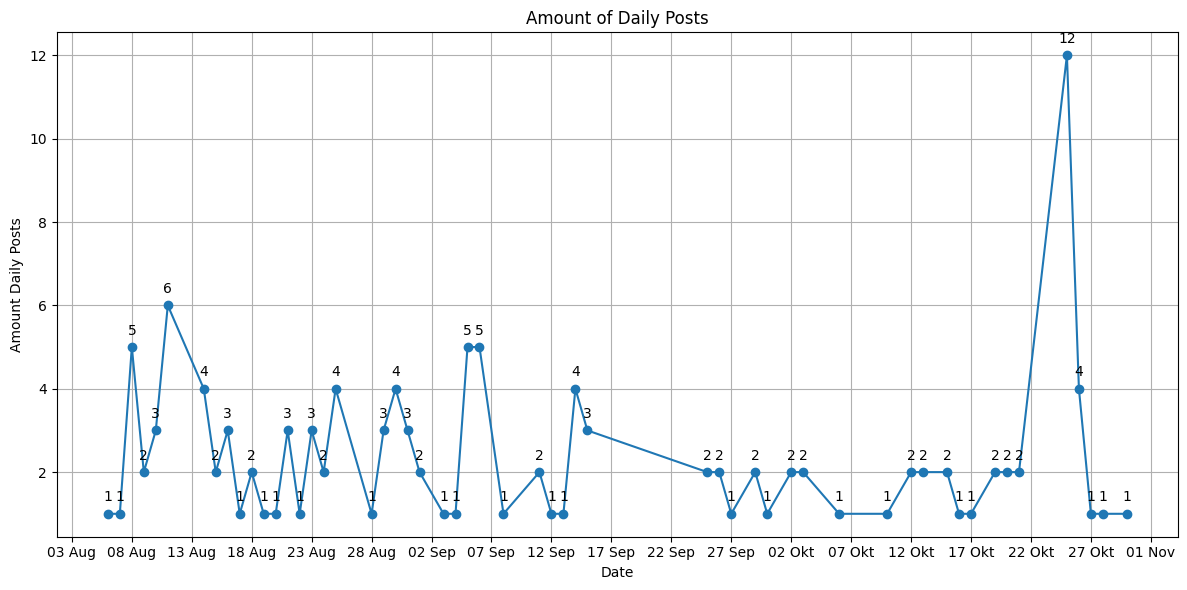

In [ ]:
# Sicherstellen, dass 'time' als datetime-Objekt formatiert ist
df_tweets['time'] = pd.to_datetime(df_tweets['time'])

# Extrahiere nur das Datum (ohne Uhrzeit) aus der 'time' Spalte
df_tweets['date_only'] = df_tweets['time'].dt.date

# Gruppiere nach Tag und zähle die Anzahl der Einträge (Posts) pro Tag
daily_posts = df_tweets.groupby('date_only')['body_cleaned'].count().reset_index()

# Spalten umbenennen
daily_posts.columns = ['Date_Only', 'Amount_Daily_Posts']

# Visualisierung 
plt.figure(figsize=(12, 6))
plt.plot(daily_posts['Date_Only'], daily_posts['Amount_Daily_Posts'], marker='o', linestyle='-', label='Daily Posts')

# Werte über den Datenpunkten anzeigen
for i in range(len(daily_posts)):
    plt.text(daily_posts['Date_Only'].iloc[i], daily_posts['Amount_Daily_Posts'].iloc[i] + 0.3, 
             str(daily_posts['Amount_Daily_Posts'].iloc[i]), fontsize=10, ha='center')

# Achsenbeschriftungen 
plt.xlabel('Date')
plt.ylabel('Amount Daily Posts')
plt.title('Amount of Daily Posts')

# Datum auf der x-Achse formatieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

# Datum in Intervallen von 5 Tagen anzeigen
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Gitterlinien 
plt.grid(True)

# Plot 
plt.tight_layout()
plt.show()

In dieser Visualisierung der täglichen Posts sind mehrere Peaks von 4-6 Posts an Tagen zu erkennen. 
Zwischen drinnen gibt es nur 1-2 Beiträge an anderen Tagen. Am auffälligsten ist der Ausreißer-Peak 
am 25 Oktober mit ganzen 12 Beiträgen an einem Tag. Hier stellt sich die Frage, ob sich dieser 
Aufschwung mit dem Aktienkurs oder Sentiment der Beiträge korreliert und ob es einen 
Zusammenhang mit bestimmten Nachrichten hat. 

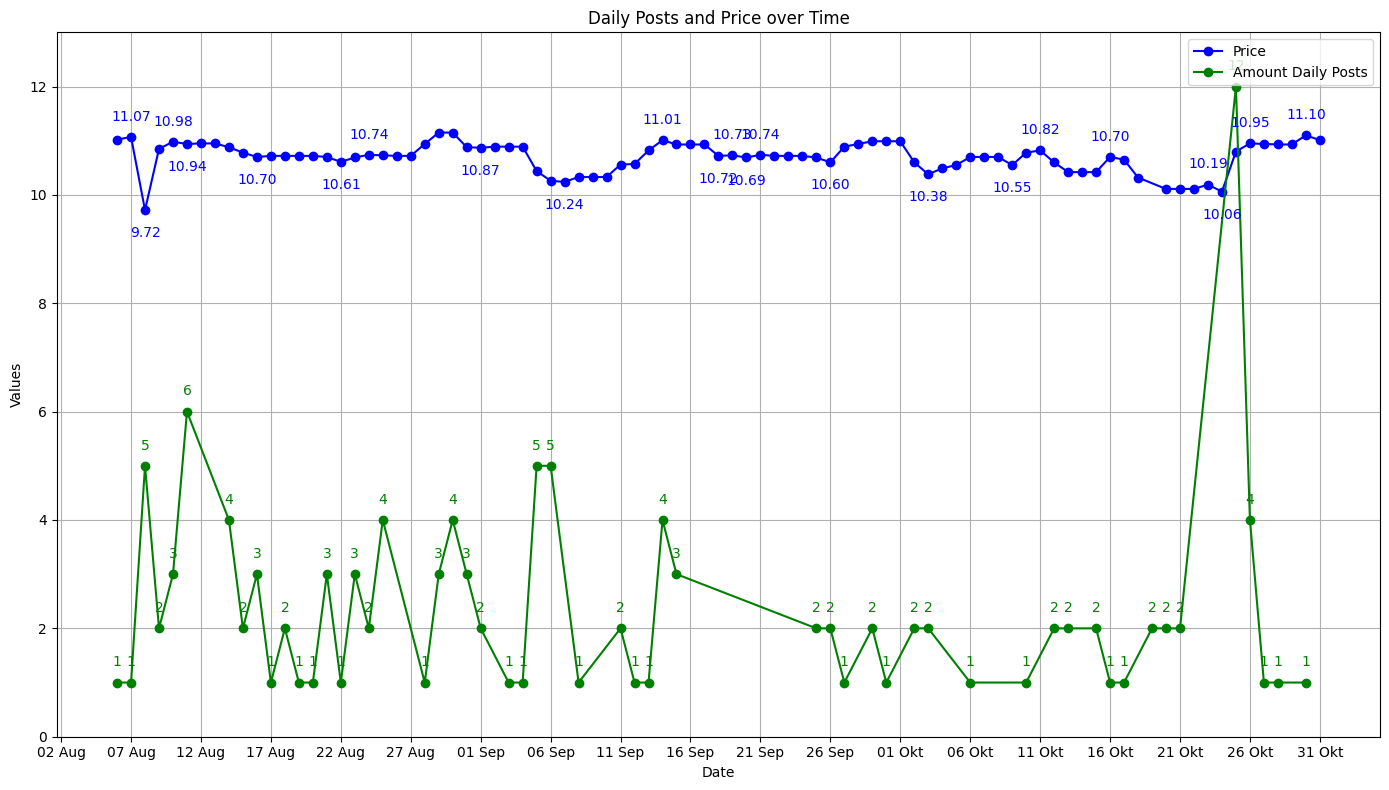

In [ ]:
# Sicherstellen, dass 'time' als datetime-Objekt formatiert ist
df_tweets['time'] = pd.to_datetime(df_tweets['time'])

# Datum aus der 'time' Spalte extrahieren
df_tweets['date_only'] = df_tweets['time'].dt.date

# Gruppiere nach Tag und zähle die Anzahl der Posts pro Tag
daily_posts = df_tweets.groupby('date_only')['body_cleaned'].count().reset_index()
daily_posts.columns = ['Date_Only', 'Amount_Daily_Posts']

# Sicherstellen, dass 'Date' als datetime-Objekt formatiert ist
df_kpi['Date'] = pd.to_datetime(df_kpi['Date'])

# Extrahiere nur das Datum aus der 'Date' Spalte
df_kpi['date_only'] = df_kpi['Date'].dt.date

# Visualisierung 
fig, ax = plt.subplots(figsize=(14, 8))

# Plot für den Preis
ax.plot(df_kpi['date_only'], df_kpi['Price'], 
        marker='o', color='blue', linestyle='-', label='Price')
ax.set_xlabel('Date')
ax.set_ylabel('Values')

# Plot für die Anzahl der täglichen Posts
ax.plot(daily_posts['Date_Only'], daily_posts['Amount_Daily_Posts'], 
        marker='o', color='green', linestyle='-', label='Amount Daily Posts')

# Werte für den Preis an den lokalen Maxima und Minima beschriften
for i in range(1, len(df_kpi) - 1):
    current_price = df_kpi['Price'].iloc[i]
    prev_price = df_kpi['Price'].iloc[i - 1]
    next_price = df_kpi['Price'].iloc[i + 1]
    
    # Wenn das aktuelle Preisdatenpunkt größer als der vorherige und nächste ist (lokales Maximum)
    if current_price > prev_price and current_price > next_price:
        ax.text(df_kpi['date_only'].iloc[i], current_price + 0.3, 
                f"{current_price:.2f}", fontsize=10, ha='center', color='blue')
    # Wenn das aktuelle Preisdatenpunkt kleiner als der vorherige und nächste ist (lokales Minimum)
    elif current_price < prev_price and current_price < next_price:
        ax.text(df_kpi['date_only'].iloc[i], current_price - 0.5, 
                f"{current_price:.2f}", fontsize=10, ha='center', color='blue')

# Werte für die Anzahl der täglichen Posts unter den Datenpunkten anzeigen
for i in range(len(daily_posts)):
    ax.text(daily_posts['Date_Only'].iloc[i], daily_posts['Amount_Daily_Posts'].iloc[i] + 0.3, 
            str(daily_posts['Amount_Daily_Posts'].iloc[i]), fontsize=10, ha='center', color='green')

# Y-Achse auf einen Bereich setzen, der sowohl den Preis als auch die Postanzahl umfasst
ax.set_ylim(0, 13)

# Datum auf der x-Achse formatieren
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Gitterlinien 
ax.grid(True)

# Titel 
plt.title('Daily Posts and Price over Time')

# Legende 
ax.legend()

# Plot anzeigen
plt.tight_layout()
plt.show()

Ein Zusammenhang ist hier gut erkennbar. Beispielsweise gab es am 07. August einen Preisaufschwung 
über den Durchschnitt von 10,73 Euro. Dieser resultierte in einem Aufschwung an Posts am nächsten 
Tag von nur einem Beitrag am vorherigen Tag zu ganzen 5 Beiträgen an einem Tag. Das Phänomen ist 
in der Visualisierung öfter zu beobachten. Am 29. August gab es wieder einen preislichen Aufschwung 
über die 11 Euro Marke, was wieder mit einem Time lag von einem Tag in einer erhöhten Posting-Bereitschaft von 4 Posts resultierte. 
Auch ist hier öfter zu beobachten das weniger gepostet wird bei herabfallendem oder stagnierendem Preis. So zum Beispiel 
bei dem preislichen Abschwung am 8 August. Am nächsten Tag gab es nur 2 Beiträge zur Aktie. 
Ein Extrembeispiel der Reaktion eines Preisaufschwunges ist im Oktober zu beobachten. Der Preis ist
eine Zeit lang, vom 16. bis 22. Oktober herabgefallen auf fast 10 Euro. Beiträge gab es im ganzen 
Oktober nicht mehr als zwei. Ab dem 25. Oktober ist aber eine stärkere Steigung des Aktienkurses 
beobachtbar und gleichzeitig am 25. Oktober ein Posting Rekord, im dreimonatigen Zeitraum, von 
ganzen 12 Beiträgen an einem Tag. Hier gab es durch den stärkeren Preisaufschwung wohl Live-Reaktionen am selben Tag. 


Zusammengefasst kann man aus dem Schaulbild ablesen, dass bei kleineren Aufschwüngen der Preise Reaktionen meist nach einem Tag gesehen, bei stärkeren Aufschwüngen jedoch Live am selben Tag reagiert wird. 

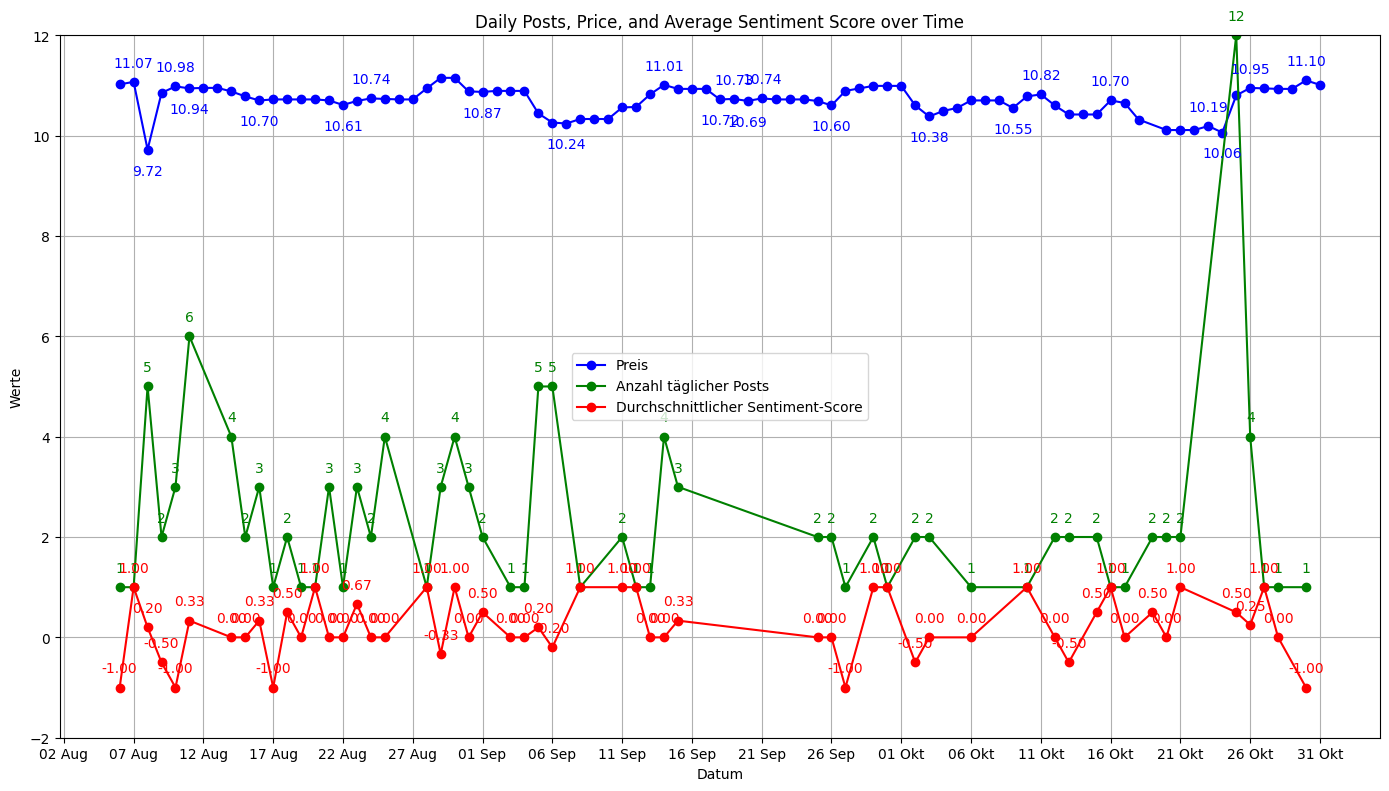

In [ ]:
# Sicherstellen, dass 'vader_score' nur -1, 0 oder 1 enthält
df_tweets = df_tweets[df_tweets['vader_score'].isin([-1, 0, 1])]

# 'time' als datetime-Objekt formatieren
df_tweets['time'] = pd.to_datetime(df_tweets['time'])

# Extrahiere das Datum aus der 'time' Spalte
df_tweets['date_only'] = df_tweets['time'].dt.date

# Gruppiere nach Datum und zähle die Anzahl der Posts pro Tag
daily_posts = df_tweets.groupby('date_only')['body_cleaned'].count().reset_index()
daily_posts.columns = ['Date_Only', 'Amount_Daily_Posts']

# Berechne den durchschnittlichen vader_score pro Tag
daily_sentiment = df_tweets.groupby('date_only')['vader_score'].mean().reset_index()
daily_sentiment.columns = ['Date_Only', 'Average_Vader_Score']

# Sicherstellen, dass 'Date' in df_kpi als datetime-Objekt formatiert ist
df_kpi['Date'] = pd.to_datetime(df_kpi['Date'])
df_kpi['date_only'] = df_kpi['Date'].dt.date

# Visualisierung 
fig, ax = plt.subplots(figsize=(14, 8))

# Plot für den Preis (blaue Linie)
ax.plot(df_kpi['date_only'], df_kpi['Price'], 
        marker='o', color='blue', linestyle='-', label='Preis')

# Plot für die Anzahl der täglichen Posts (grüne Linie)
ax.plot(daily_posts['Date_Only'], daily_posts['Amount_Daily_Posts'], 
        marker='o', color='green', linestyle='-', label='Anzahl täglicher Posts')

# Plot für den durchschnittlichen vader_score (rote Linie)
ax.plot(daily_sentiment['Date_Only'], daily_sentiment['Average_Vader_Score'], 
        marker='o', color='red', linestyle='-', label='Durchschnittlicher Sentiment-Score')

# Achsenbeschriftungen 
ax.set_xlabel('Datum')
ax.set_ylabel('Werte')

# Achsenskalierung für y-Achse setzen
ax.set_ylim(-2, 12)

# Werte für den Preis an lokalen Maxima und Minima beschriften
for i in range(1, len(df_kpi) - 1):
    current_price = df_kpi['Price'].iloc[i]
    prev_price = df_kpi['Price'].iloc[i - 1]
    next_price = df_kpi['Price'].iloc[i + 1]
    
    # Lokales Maximum
    if current_price > prev_price and current_price > next_price:
        ax.text(df_kpi['date_only'].iloc[i], current_price + 0.3, 
                f"{current_price:.2f}", fontsize=10, ha='center', color='blue')
    # Lokales Minimum
    elif current_price < prev_price and current_price < next_price:
        ax.text(df_kpi['date_only'].iloc[i], current_price - 0.5, 
                f"{current_price:.2f}", fontsize=10, ha='center', color='blue')

# Werte für die Anzahl der täglichen Posts über den Datenpunkten anzeigen
for i in range(len(daily_posts)):
    ax.text(daily_posts['Date_Only'].iloc[i], daily_posts['Amount_Daily_Posts'].iloc[i] + 0.3, 
            str(daily_posts['Amount_Daily_Posts'].iloc[i]), fontsize=10, ha='center', color='green')

# Werte für den durchschnittlichen vader_score über den Datenpunkten anzeigen
for i in range(len(daily_sentiment)):
    ax.text(daily_sentiment['Date_Only'].iloc[i], daily_sentiment['Average_Vader_Score'].iloc[i] + 0.3, 
            f"{daily_sentiment['Average_Vader_Score'].iloc[i]:.2f}", fontsize=10, ha='center', color='red')

# Datum auf der x-Achse formatieren
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Gitterlinien 
ax.grid(True)

# Titel 
plt.title('Daily Posts, Price, and Average Sentiment Score over Time')

# Legende 
ax.legend()

# Layout anpassen
plt.tight_layout()

# Gitterlinien anzeigen und oberste entfernen
ax.grid(axis='y', which='major', zorder=1)

plt.show()

Nimmt man den Vader Score auch noch mit in die Visualisierung , ist erkennbar, dass zum Beispiel bei 
dem Preisaufschwung nach dem 8. August mehr gepostet wird und der Vader Score auch wieder positiv 
wird. Die Stimmung auf dem Markt also auch wieder positiv wird. Hier sollte noch erwähnt werden, 
dass es mit den geringen Posts von nur 1-3 an Tagen schwer ist das Meinungsbild zur Aktie 
widerzuspiegeln. 

Es ist aber zu beobachten, dass bei geringfügigen Posts von nur einem oder zwei an einem Tag der 
Sentiment-Score eher negativ oder neutral ist und bei Posts von mehr als zwei an einem Tag es eher zu positivem 
Score tendiert, was die vorherige Vermutung bestätigt, dass bei Preisaufschwung mehr gepostet wird 
und die Stimmung auch allgemein eher positiv ist. 

Das sieht danach aus, dass sich der Sentiment-Score und die Anzahl der Posts korrelieren. Als nächstes 
wäre also eine statistische Analyse mit der Korrelationsmatrix interessant, um zu sehen, ob es eine 
lineare Beziehung gibt und wie stark diese ist.

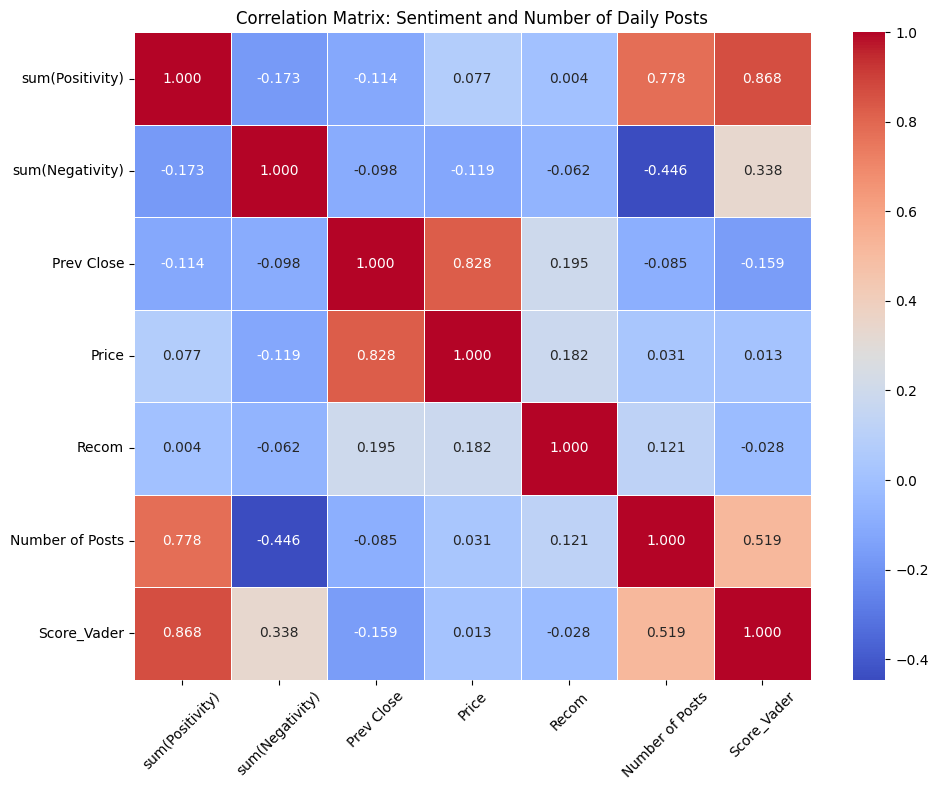

In [411]:
df_tweets['time'] = pd.to_datetime(df_tweets['time'])
df_tweets['date_only'] = df_tweets['time'].dt.date

# Berechnung der Summe der positiven und negativen Scores
df_tweets['vader_score_encoded'] = df_tweets['vader_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
sum_positivity = df_tweets[df_tweets['vader_score_encoded'] == 1].groupby('date_only')['vader_score_encoded'].sum()
sum_negativity = df_tweets[df_tweets['vader_score_encoded'] == -1].groupby('date_only')['vader_score_encoded'].sum()
number_of_posts = df_tweets.groupby('date_only')['body_cleaned'].count()
score_vader = df_tweets.groupby('date_only')['vader_score'].sum()

# Sicherstellen, dass df_kpi ein 'date_only' Feld enthält
df_kpi['Date'] = pd.to_datetime(df_kpi['Date'])
df_kpi['date_only'] = df_kpi['Date'].dt.date

# Hinzufügen der berechneten Werte zu df_kpi
df_kpi = df_kpi.set_index('date_only')
df_kpi['sum(Positivity)'] = sum_positivity
df_kpi['sum(Negativity)'] = sum_negativity
df_kpi['Number of Posts'] = number_of_posts  # Neue Bezeichnung verwenden
df_kpi['Score_Vader'] = score_vader

# Auffüllen von NaN-Werten mit 0
df_kpi.fillna(0, inplace=True)

# Auswahl der Attribute für die Korrelationsmatrix
attributes = ['sum(Positivity)', 'sum(Negativity)', 'Prev Close', 'Price', 'Recom', 'Number of Posts', 'Score_Vader']

# Korrelationsmatrix 
correlation_matrix = df_kpi[attributes].corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".3f", linewidths=0.5)
plt.title('Correlation Matrix: Sentiment and Number of Daily Posts')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Die Anzahl der täglichen Posts und der positive Sentiment-Score habe eine hohe positive Korrelation 
mit 0.778, was darauf hindeutet, dass es eine starke positive Beziehung zwischen der Anzahl an 
positiven Posts und der Gesamtzahl der Posts gibt. Das bestätigt also, dass an Tagen an denen mehr 
gepostet wird, die Posts dazu tendieren positiver zu sein. 


Die Anzahl der täglichen Posts und der negative Sentiment-Score haben eine negative Korrelation, 
mit -0.446, was darauf hindeutet, dass es eine negative Beziehung zwischen der Anzahl an 
negativen Posts und der Gesamtzahl der Posts gibt. Das bestätigt, dass an Tagen an denen weniger
gepostet wird, die Posts dazu tendieren negativer zu sein. 


Allgemein kann man zu der Korrelation von -0.446 sagen, dass bei steigendem Posting auch negative 
Stimmungen dabei sind, aber die Gesamtstimmung wohl eher zum positiven tendiert. Auch könnte dies 
bedeuten, dass negative Stimmungen nicht stark genug sind, um eine größere Reaktion in der 
Community auszulösen bzw. eine erhöhte Posting-Aktivität.


Dass das Score_Vader Attribut mit 1 für positiv, 0 für neutral und -1 für negativ eine positive Korrelation von 0.519 hat deutet auch darauf hin, dass es einen Zusammenhang 
zwischen Stimmung und der Anzahl der Posts gibt, aber dieser Zusammenhang nicht stark ist und auch 
andere Faktoren die Anzahl der Posts beeinflussen, wie beispielweise bestimmte Ereignisse. 

Insgesamt lasst sich aus der Korrelationsmatrix ableiten, dass es eine Verbindung zwischen der 
Stimmung in den Posts und der Posting Aktivität der Aktie gibt.

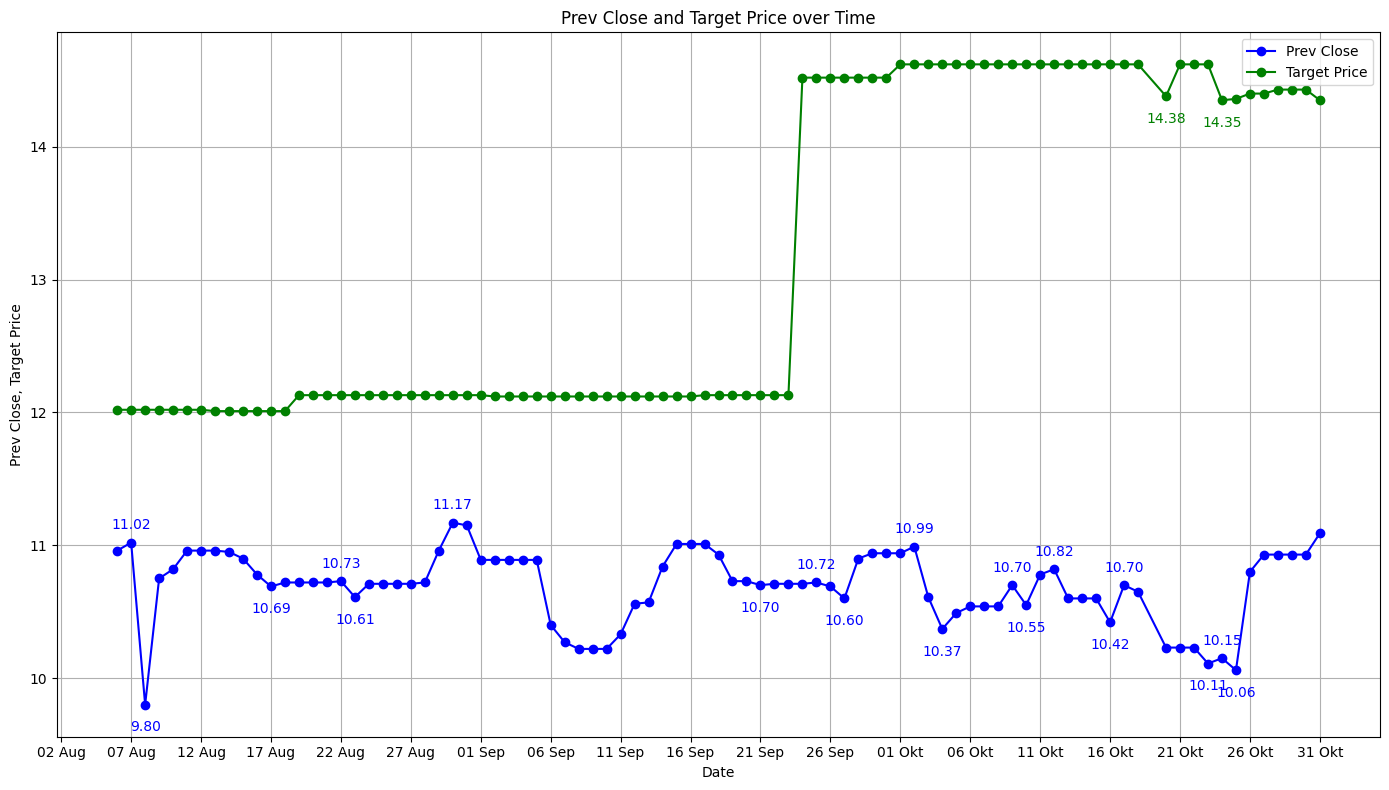

In [ ]:
# Sicherstellen, dass 'Date' in df_kpi als datetime-Objekt formatiert ist
df_kpi['Date'] = pd.to_datetime(df_kpi['Date'])

# Visualisierung 
fig, ax = plt.subplots(figsize=(14, 8))

# Plot für 'Prev Close' (blaue Linie)
ax.plot(df_kpi['Date'], df_kpi['Prev Close'], 
        marker='o', color='blue', linestyle='-', label='Prev Close')

# Plot für 'Target Price' (grüne Linie)
ax.plot(df_kpi['Date'], df_kpi['Target Price'], 
        marker='o', color='green', linestyle='-', label='Target Price')

# Achsenbeschriftungen 
ax.set_xlabel('Date')
ax.set_ylabel('Prev Close, Target Price')

# Werte für 'Prev Close' an lokalen Maxima und Minima beschriften
for i in range(1, len(df_kpi) - 1):
    current_price = df_kpi['Prev Close'].iloc[i]
    prev_price = df_kpi['Prev Close'].iloc[i - 1]
    next_price = df_kpi['Prev Close'].iloc[i + 1]
    
    # Lokales Maximum
    if current_price > prev_price and current_price > next_price:
        ax.text(df_kpi['Date'].iloc[i], current_price + 0.1, 
                f"{current_price:.2f}", fontsize=10, ha='center', color='blue')
    # Lokales Minimum
    elif current_price < prev_price and current_price < next_price:
        ax.text(df_kpi['Date'].iloc[i], current_price - 0.2, 
                f"{current_price:.2f}", fontsize=10, ha='center', color='blue')

# Werte für 'Target Price' an lokalen Maxima und Minima beschriften
for i in range(1, len(df_kpi) - 1):
    current_target = df_kpi['Target Price'].iloc[i]
    prev_target = df_kpi['Target Price'].iloc[i - 1]
    next_target = df_kpi['Target Price'].iloc[i + 1]
    
    # Lokales Maximum
    if current_target > prev_target and current_target > next_target:
        ax.text(df_kpi['Date'].iloc[i], current_target + 0.1, 
                f"{current_target:.2f}", fontsize=10, ha='center', color='green')
    # Lokales Minimum
    elif current_target < prev_target and current_target < next_target:
        ax.text(df_kpi['Date'].iloc[i], current_target - 0.2, 
                f"{current_target:.2f}", fontsize=10, ha='center', color='green')

# Datum auf der x-Achse formatieren
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Gitterlinien 
ax.grid(True)

# Titel 
plt.title('Prev Close and Target Price over Time')

# Legende 
ax.legend()

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

Als nächstes ist ein Blick auf den Vergleich des aktuellen Preises und Zielkurses spannend, da man so 
wertvolle Einblicke in die Markterwartungen gewinnen kann. 


Bis zum 23. September war der Zielkurs mit etwa 12 Euro nahe dem Preis. Aber am 24 September hat 
sich der Zielkurs stark erhöht, mit einem Anstieg von drei Euro, was den Abstand erhöht hat. Dies 
könnte auf eine Überbewertung der Aktie hinweisen. Nichtsdestotrotz, ist ein stärkerer anstieg Ende 
Oktober bemerkbar, weshalb zumindest der vorherige Zielkurs von etwa 12 Euro in den nächsten 
Wochen/Monaten erreicht werden könnte. 


Ein plötzlicher Anstieg des Zielkurses, wie ab dem 24 September bemerkbar, kann auf eine positive 
Veränderung in der Erwartung der Analysten hinweisen. Möglicherweise durch gute 
Unternehmensnachrichten oder besseren Gewinnaussichten. 


Am 25 Oktober gab es einen Earnings Call und eine Veröffentlichung der Finanzdaten, woraufhin die 
Aktie auch stark anstieg. Dies könnte einen Zusammenhang haben, die die Analysten vorausgesehen 
haben.

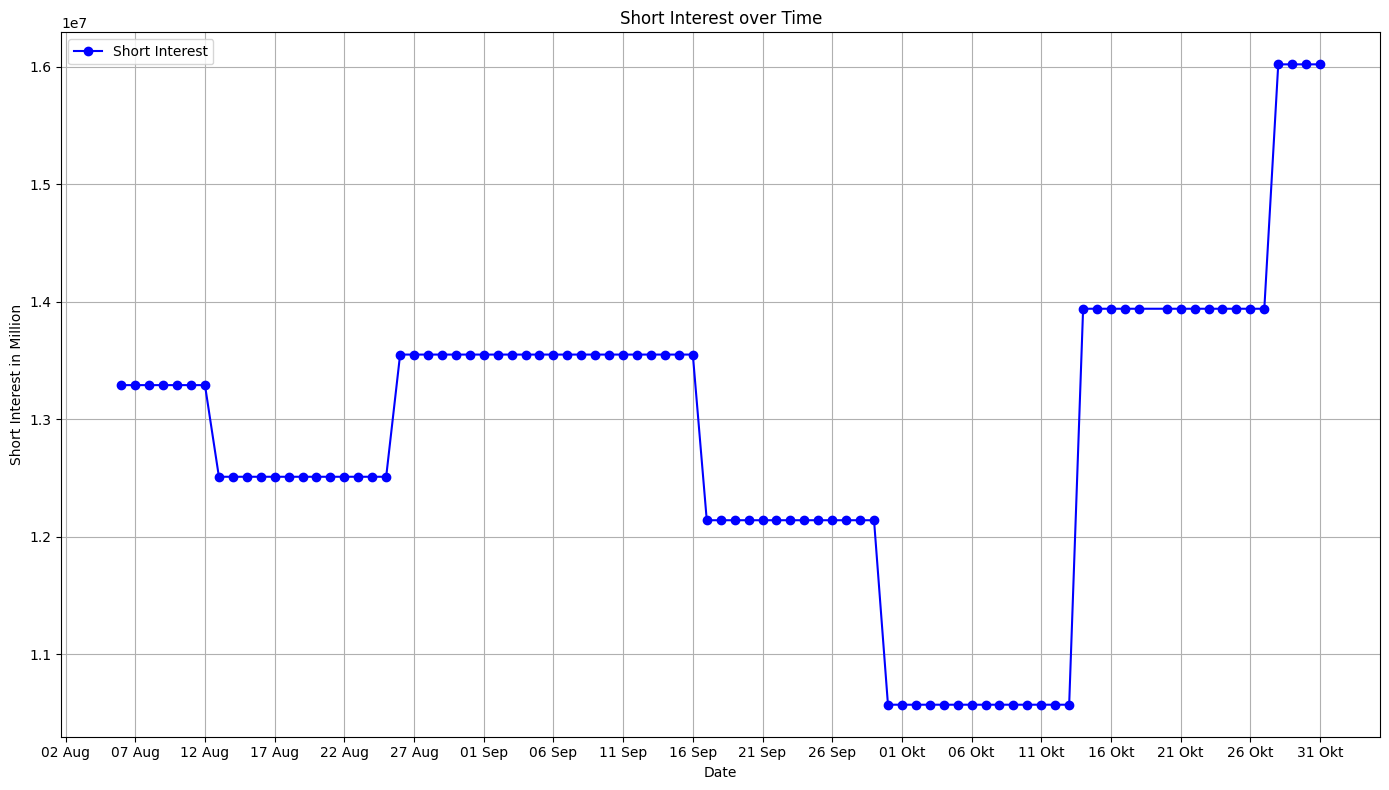

In [ ]:
# Sicherstellen, dass 'Date' in df_kpi als datetime-Objekt formatiert ist
df_kpi['Date'] = pd.to_datetime(df_kpi['Date'])

# Visualisierung 
fig, ax = plt.subplots(figsize=(14, 8))

# Plot für 'Short Interest' (blaue Linie)
ax.plot(df_kpi['Date'], df_kpi['Short Interest'], 
        marker='o', color='blue', linestyle='-', label='Short Interest')

# Achsenbeschriftungen 
ax.set_xlabel('Date')
ax.set_ylabel('Short Interest in Million')

# Werte für 'Short Interest' an lokalen Maxima und Minima beschriften
for i in range(1, len(df_kpi) - 1):
    current_interest = df_kpi['Short Interest'].iloc[i]
    prev_interest = df_kpi['Short Interest'].iloc[i - 1]
    next_interest = df_kpi['Short Interest'].iloc[i + 1]
    
    # Lokales Maximum
    if current_interest > prev_interest and current_interest > next_interest:
        ax.text(df_kpi['Date'].iloc[i], current_interest + 0.1, 
                f"{current_interest:.2f}", fontsize=10, ha='center', color='blue')
    # Lokales Minimum
    elif current_interest < prev_interest and current_interest < next_interest:
        ax.text(df_kpi['Date'].iloc[i], current_interest - 0.2, 
                f"{current_interest:.2f}", fontsize=10, ha='center', color='blue')

# Datum auf der x-Achse formatieren
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Gitterlinien 
ax.grid(True)

# Titel 
plt.title('Short Interest over Time')

# Legende 
ax.legend()

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

Im Allgemeinen kann man durch den Short Interest die Marktmeinung zu einer bestimmten Aktie 
rauslesen. Ein niedriger Short Interest weist dabei darauf hin, dass wenige Investoren einen Preisverfall 
erwarten und die Aktie eher als steigend (bullish) sehen. Im Gegensatz dazu zeigt ein hoher Short
Interest, dass viele Investoren erwarten, dass der Preis fallen wird (bearish). 


Dies ist im Oktober gut erkennbar. Anfang Oktober ist der Short Interest dabei noch niedrig, steigt aber 
immer weiter auf im Laufe des Monats. 


Ab dem 22 Oktober, kurz vor der Veröffentlichung der Finanzergebnisse, ist der Aktienkurs auch stark 
angestiegen, was als Reaktion wahrscheinlich auch den Anstieg des Short Interest zufolge hatte. 

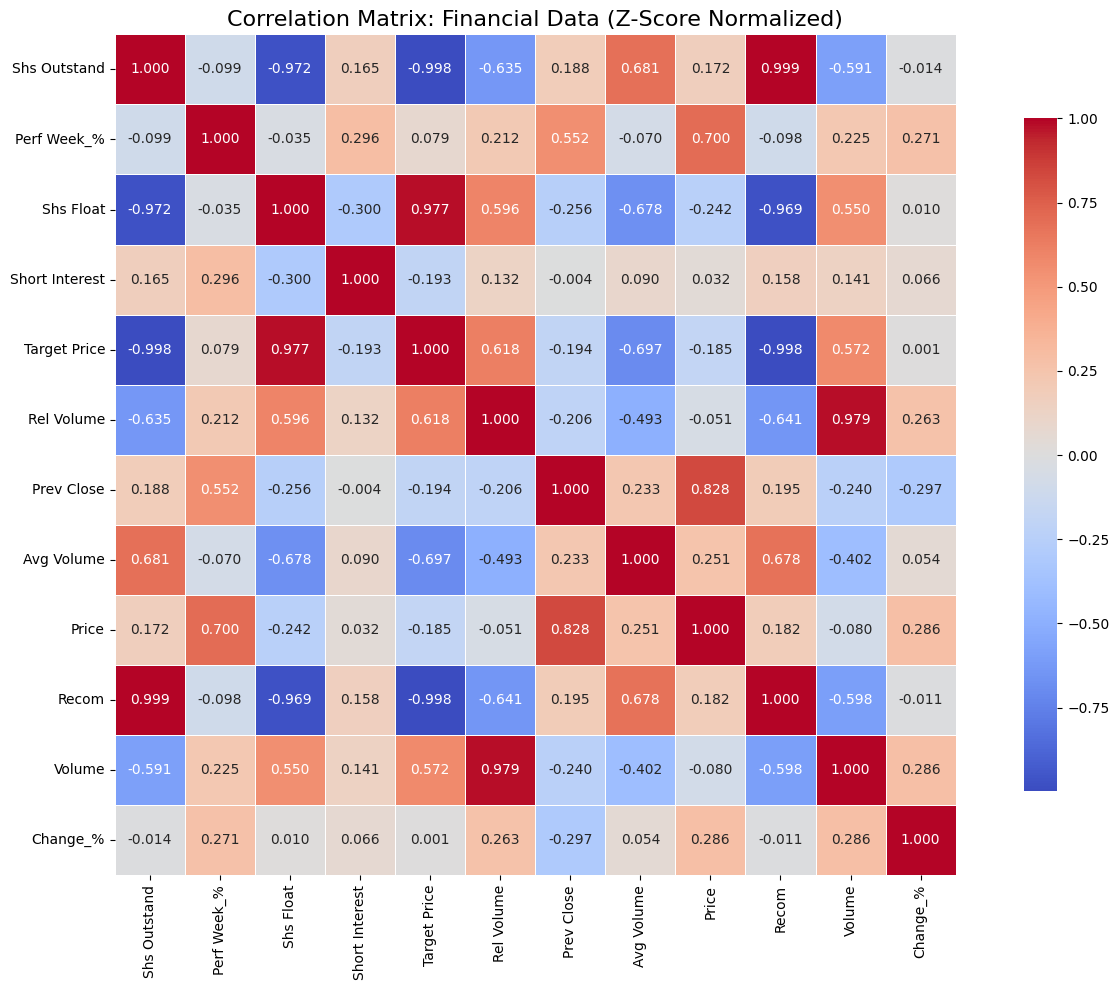

In [414]:
# Relevante Finanzdaten 
finanzdaten = df_kpi[[
    'Shs Outstand', 'Perf Week_%', 'Shs Float', 'Short Interest', 
    'Target Price', 'Rel Volume', 'Prev Close',
    'Avg Volume', 'Price', 'Recom', 'Volume', 'Change_%'
]]

# Z-Score Normalisierung auf die Finanzdaten anwenden
finanzdaten_normalisiert = finanzdaten.apply(zscore)

# Korrelation berechnen
korrelation = finanzdaten_normalisiert.corr()

# Korrelationsmatrix visualisieren
plt.figure(figsize=(14, 10))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

# Titel 
plt.title('Correlation Matrix: Financial Data (Z-Score Normalized)', fontsize=16)
plt.tight_layout()

# Plot 
plt.show()

In dieser Abbildung sind die Finanzdaten, die vorher mit der Z-Score-Normalisierung normalisiert 
wurden, abgebildet. 


Je dunkler die Farbe Lila ist, desto stärker ist dabei die Korrelation. Im Folgenden werden paar 
Beispielkorrelationen genannt und interpretiert:
Als erstes fällt die sehr hohe negative Korrelation zwischen „Recom“ und „Target Price“ auf mit einer 
Korrelation von -0.998. Dies weist darauf hin, dass die zwei Variablen in entgegengesetzte Richtungen 
tendieren. 1 heißt Kauf und 5 heißt Verkauf bei „Recom“, was in diesem Fall bedeuten würde, dass bei 
steigendem Zielpreis die Analysten zum Kauf der Aktie empfehlen. 


Ein weiteres Beispiel ist die negative Korrelation zwischen „Avg Volume_Mill“ und „Target Price“ mit 
dem Wert von -0.697. Dies bedeutet, dass der Zielkurs sinkt bei steigendem Handelsvolumen. Ein 
Grund dafür könnte zum Beispiel sein, dass der Anstieg des durchschnittlichen Handelsvolumens zu 
erhöhtem Verkaufsdruck oder einer negativen Marktstimmung führt, was sich negativ auf den Zielkurs 
auswirken kann. 


„Price“ und „Perf Week“ haben eine positive Korrelation von 0.7, bzw. mit Prev Close von 0.55, was 
bedeutet, dass der Preis steigt, wenn die wöchentliche Performance steigt und andersherum. 


Es ist aber immer zu beachten, dass die positive Beziehung auch durch andere Faktoren beeinflusst 
werden kann, gerade wegen der geringeren Korrelation von 0.55 zwischen Prev Close und Perf Week. 
Bei einer intensiveren Analyse ist es also ratsam weitere Faktoren mit einzubeziehen.

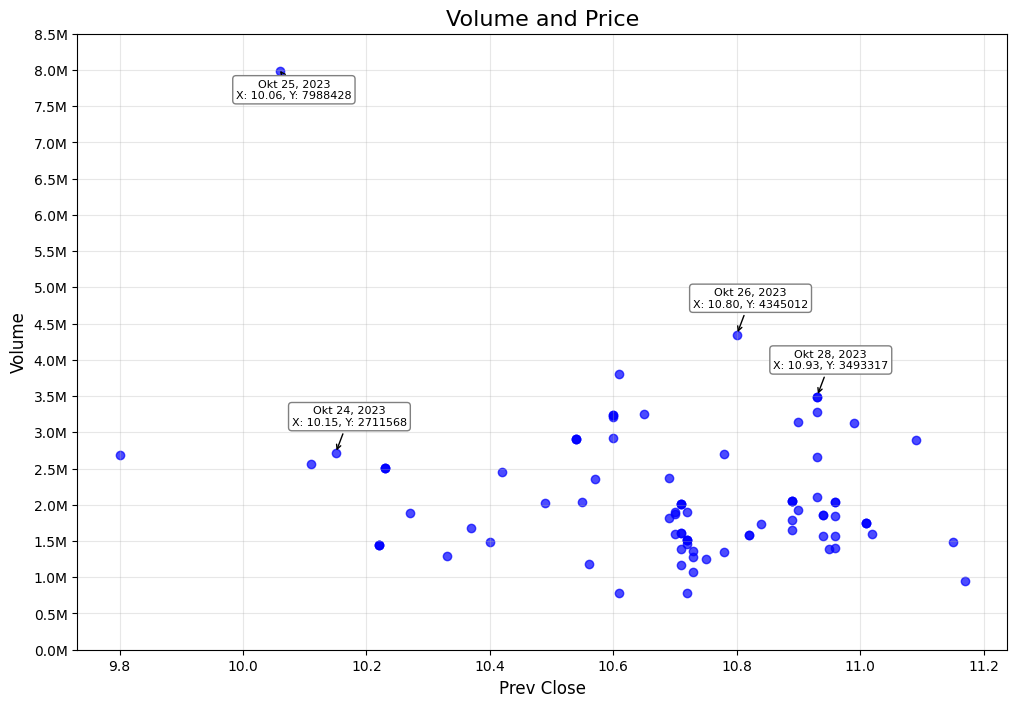

In [415]:
# Scatter Plot 
plt.figure(figsize=(12, 8))
plt.scatter(df_kpi['Prev Close'], df_kpi['Volume'], alpha=0.7, color='blue')

# Achsentitel und Plot-Titel 
plt.title('Volume and Price', fontsize=16)
plt.xlabel('Prev Close', fontsize=12)
plt.ylabel('Volume', fontsize=12)

# Y-Achse anpassen (in 500k-Schritten bis 8.5M, als Millionen dargestellt)
ticks = np.arange(0, 8_500_001, 500_000)  # 500k-Schritte
tick_labels = [f"{x / 1_000_000:.1f}M" for x in ticks]  # In Millionen formatieren
plt.ylim(0, 8_500_000)  # Maximalwert anpassen
plt.yticks(ticks=ticks, labels=tick_labels)

# Bestimmte Punkte markieren
highlight_dates = ['2023-10-24', '2023-10-25', '2023-10-26', '2023-10-28']
highlight_points = df_kpi[df_kpi['Date'].dt.strftime('%Y-%m-%d').isin(highlight_dates)]

for _, row in highlight_points.iterrows():
    # Positionierung der Annotation anpassen
    if row['Date'].strftime('%Y-%m-%d') == '2023-10-25':  # Oberster Punkt bleibt unten
        xytext = (10, -20)  # Text unterhalb des Punktes
    else:
        xytext = (10, 20)  # Text oberhalb des Punktes

    # Annotation mit Pfeilen
    plt.annotate(
        f"{row['Date'].strftime('%b %d, %Y')}\nX: {row['Prev Close']:.2f}, Y: {row['Volume']:.0f}",
        (row['Prev Close'], row['Volume']),
        textcoords="offset points",
        xytext=xytext,
        ha='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'),
        arrowprops=dict(
            arrowstyle="->",  # Pfeilstil
            connectionstyle="arc3",  # Verbindung (leicht gebogen)
            color='black',  # Farbe des Pfeils
            lw=1  # Linienbreite
        )
    )

# Gitterlinien 
plt.grid(alpha=0.3)
plt.show()

In dieser Scatter-Plott Visualisierung untersuche ich wie sich das Handelsvolumen im Verhältnis zu 
Preisänderungen verhält. Ein steigendes Volumen bei steigenden Preisen kann dabei ein bullisches 
Signal sein, während ein steigendes Volumen bei fallenden Preisen bearish interpretiert werden kann.

Auffallend sind zwei Cluster. Einmal bei dem Preispunkt 10,80 Euro und 10,95 Euro. Dies könnten 
signifikante Preisniveaus für Investoren darstellen, wie beispielweise psychologische Preisgrenzen. 
Oder aber auch Cluster die erhöhte Handelsaktivität an diesen Preispunkten aufzeigen.  

Am 25. Oktober gibt es einen Ausreißer mit einem Volumen von 7.988.428. Es kann durchaus passieren, 
dass es Ausreißer an besonderen Ereignissen gibt oder durch bestimmte Nachrichten.  

Am 25. Oktober gab es die Veröffentlichung der Finanzdaten und den Earning Call, was wohl den 
starken Anstieg hervorgebracht hat.  

Wie man an der Abbildung sehen kann, ist das Volumen am 23. und 24. Oktober noch relativ weit unten 
im Bereich zwischen 2.500.000 und 3.000.000. Am 25. Oktober ist dieser aber etwa im selben Bereich stark angestiegen und darauffolgend in den nächsten Tagen auch der Preis, wobei sich das Volumen 
wieder verringert hat. Dies kann man an den markierten Datenpunkten auf der rechten Seite der 
Abbildung erkennen.

In [416]:
# DataFrame nach 'time' absteigend sortieren
df_sorted = df_tweets[['username', 'time', 'body_cleaned']].sort_values(by='time', ascending=False)

# Die obersten 19 Zeilen anzeigen
df_sorted.head(19)

,username,time,body_cleaned
132,BigBreakingWire,2023-10-30 07:49:00,Big Breaking JPMorgan equity strategists have ...
131,STCKPRO,2023-10-28 14:23:00,NEW ARTICLE Kinsale Capital drops WTW climbs i...
130,STCKPRO,2023-10-27 01:46:00,NEW ARTICLE Analysts Are Bullish on Top Financ...
126,Contrarian_Dan,2023-10-26 14:03:00,I doubt this price holds in this environment. ...
127,STCKPRO,2023-10-26 08:17:00,NEW ARTICLE China is on the right path but it ...
128,StockAutomatePro,2023-10-26 07:02:00,Stock is looking strong and set to rise based ...
129,HarveyToronto,2023-10-26 01:51:00,book value per share
114,EarningsInsider,2023-10-25 16:03:00,updates FY 2023 guidance to EPS and revenue gu...
115,cctranscripts,2023-10-25 13:41:00,Useful remarks stated on the conference transc...
116,OpenOutcrier,2023-10-25 12:54:00,(+6.0% pre) Deutsche Bank shares surge as it p...


Sieht man sich nun die Beiträge am 25. Oktober an, dann sieht man, dass diese sich um die 
Veröffentlichung der Finanzdaten und dem Earning Call handeln. Ein Beispiel dafür ist der Beitrag in 
Zeile 120 von Ainvest_Newswire mit „Deutsche Bank shares surge 6.3% in premarket trading after net profit beats 
expectations“. 

Dieser Post liefert wichtige Informationen über aktuelle Entwicklungen auf dem Aktienmarkt. Es wird 
erwähnt, dass die Aktien der Deutschen Bank im vorbörslichen Handel um 6,3% gestiegen sind. Der 
Vorbörsliche Handel bietet dabei einen Indikator dafür, wie sich die Aktien zum Handelsbeginn 
bewegen könnten, was in diesem Fall eine positive Bewegung vordeutet.  

Auch wird erwähnt, dass der Anstieg der Aktien erfolgte, nachdem die Deutsche Bank bessere Gewinne 
veröffentlicht hat, als vom Markt erwartet wurde, was eine positive Marktreaktion zur Folge hatte.  

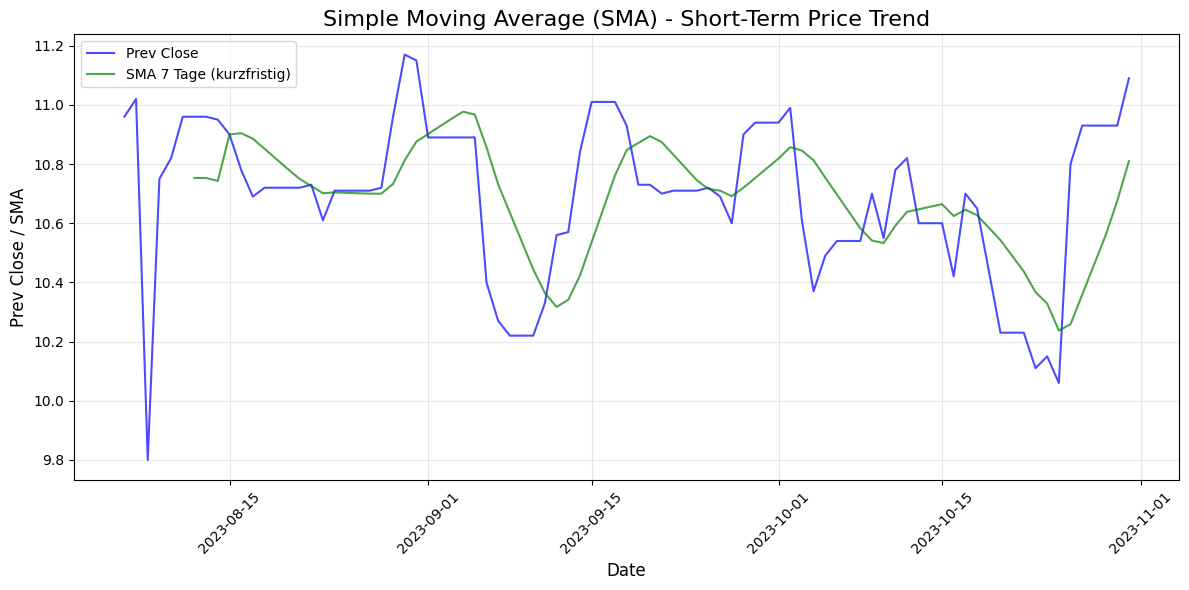

In [ ]:
# Simple Moving Average (SMA) berechnen (7 Tage)
df_kpi['SMA_7'] = df_kpi['Prev Close'].rolling(window=7).mean()

# Visualisierung 
plt.figure(figsize=(12, 6))

# Linie: Prev Close
plt.plot(df_kpi['Date'], df_kpi['Prev Close'], label='Prev Close', color='blue', alpha=0.7)

# Linie: SMA 7 Tage
plt.plot(df_kpi['Date'], df_kpi['SMA_7'], label='SMA 7 Tage (kurzfristig)', color='green', alpha=0.7)

# Diagramm 
plt.title('Simple Moving Average (SMA) - Short-Term Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prev Close / SMA', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Achsen formatieren
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Mit diesem gleitenden Durchschnitt filtere ich wöchentliche Schwankungen raus, um einen klareren 
Überblick über die kurzfristige Preisentwicklung zu erhalten. Wenn der aktuelle Preis dabei über dem 
7-Tage-SMA liegt, wird dies als positive Marktdynamik interpretiert und bei dem aktuellen Preis unter 
dem SMA, wird dies als negative kurzfristige Marktdynamik interpretiert. 

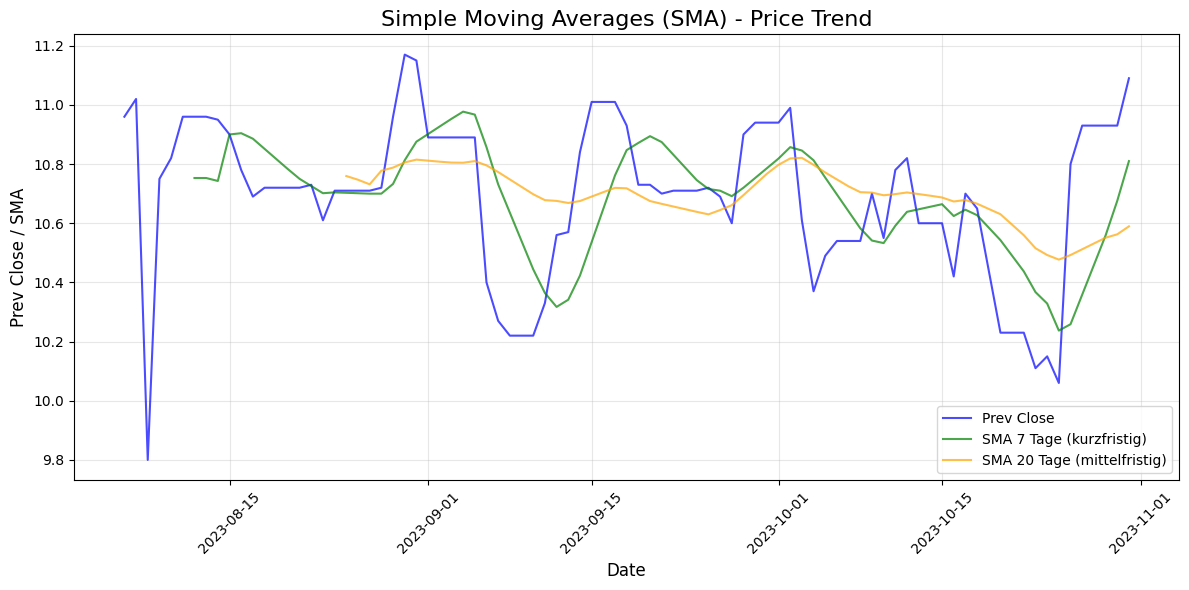

In [ ]:
# Simple Moving Average (SMA) berechnen (7 Tage)
df_kpi['SMA_7'] = df_kpi['Prev Close'].rolling(window=7).mean()

# Simple Moving Average (SMA) berechnen (20 Tage)
df_kpi['SMA_20'] = df_kpi['Prev Close'].rolling(window=20).mean()

# Visualisierung 
plt.figure(figsize=(12, 6))

# Linie: Prev Close
plt.plot(df_kpi['Date'], df_kpi['Prev Close'], label='Prev Close', color='blue', alpha=0.7)

# Linie: SMA 7 Tage
plt.plot(df_kpi['Date'], df_kpi['SMA_7'], label='SMA 7 Tage (kurzfristig)', color='green', alpha=0.7)

# Linie: SMA 20 Tage
plt.plot(df_kpi['Date'], df_kpi['SMA_20'], label='SMA 20 Tage (mittelfristig)', color='orange', alpha=0.7)

# Diagramm 
plt.title('Simple Moving Averages (SMA) - Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prev Close / SMA', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Achsen formatieren
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hier fokussiere ich mich auf die mittelfristigen Trends, die einen ausgeglichenen Überblick über die 
Preisentwicklung geben und damit einen stabileren Trendindikator als der 7-Tage SMA.  

Dabei deutet ein Preis, der konsequent über dem 20-Tage SMA liegt auf einen anhaltenden 
Aufwärtstrend, während ein Preis der konsequent unter dem 20-Tage SMA liegt, auf einen anhaltenden 
Abwärtstrend hin.  

Wenn man beide SMA-Linien betrachtet, sieht man mehrere Kreuzpunkte zwischen beiden Linien, die 
als Handelssignale interpretiert werden können. Ein Aufwärtskreuz, bei dem der 7-Tage SMA von unten nach oben geht, könnte dabei ein Kaufsignal sein, während ein Abwärtskreuz ein Verkaufssignal sein 
könnte.  

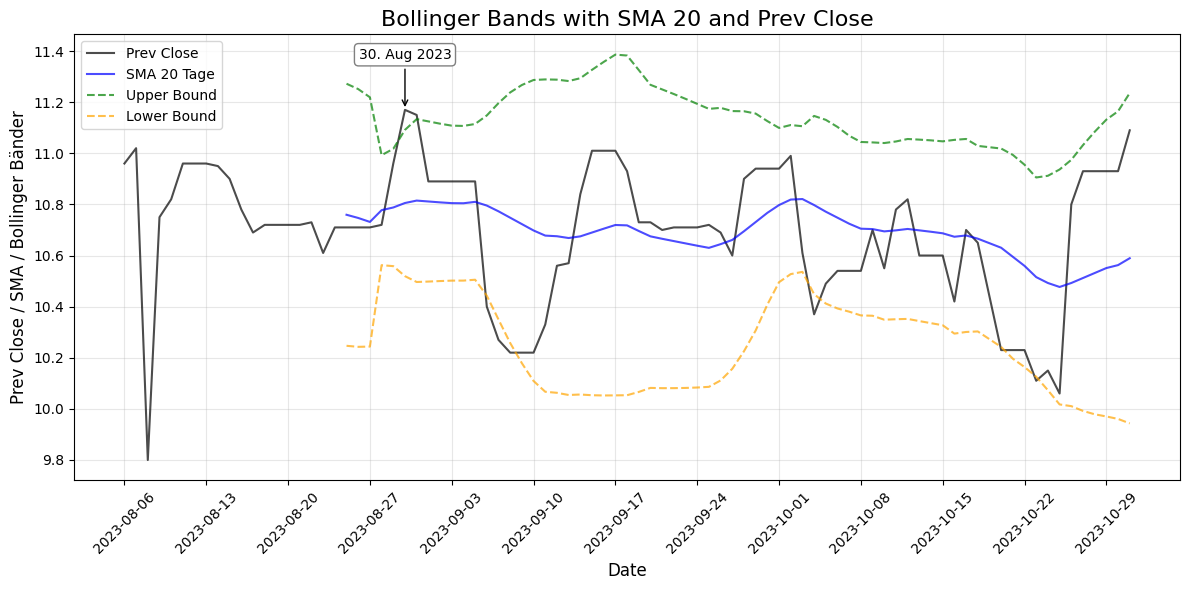

In [ ]:
# SMA 20 Tage berechnen
df_kpi['SMA_20'] = df_kpi['Prev Close'].rolling(window=20).mean()

# Standardabweichung für Bollinger Bänder berechnen
df_kpi['SMA20_Deviation'] = df_kpi['Prev Close'].rolling(window=20).std()

# Bollinger Bänder berechnen
df_kpi['upper_bound'] = df_kpi['SMA_20'] + (2 * df_kpi['SMA20_Deviation'])
df_kpi['lower_bound'] = df_kpi['SMA_20'] - (2 * df_kpi['SMA20_Deviation'])

# Visualisierung erstellen
plt.figure(figsize=(12, 6))

# Linie: Prev Close
plt.plot(df_kpi['Date'], df_kpi['Prev Close'], label='Prev Close', color='black', alpha=0.7)

# Linie: SMA 20 Tage
plt.plot(df_kpi['Date'], df_kpi['SMA_20'], label='SMA 20 Tage', color='blue', alpha=0.7)

# Linie: Bollinger Bänder
plt.plot(df_kpi['Date'], df_kpi['upper_bound'], label='Upper Bound', color='green', linestyle='--', alpha=0.7)
plt.plot(df_kpi['Date'], df_kpi['lower_bound'], label='Lower Bound', color='orange', linestyle='--', alpha=0.7)

# Annotation für 30. August
date_to_annotate = pd.Timestamp("2023-08-30")
row_to_annotate = df_kpi[df_kpi['Date'] == date_to_annotate].iloc[0]
plt.annotate(
    f"{row_to_annotate['Date'].strftime('%d. %b %Y')}",
    xy=(row_to_annotate['Date'], row_to_annotate['Prev Close']),  # Punkt der Annotation
    xytext=(row_to_annotate['Date'], row_to_annotate['Prev Close'] + 0.2),  # Position des Textes
    textcoords="data",
    ha='center',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'),
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3",
        color='black',
        lw=1
    )
)

# Diagramm 
plt.title('Bollinger Bands with SMA 20 and Prev Close', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prev Close / SMA / Bollinger Bänder', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Achsen formatieren
plt.xticks(
    ticks=pd.date_range(start=df_kpi['Date'].min(), end=df_kpi['Date'].max(), freq='7D'),
    rotation=45,
    fontsize=10
)
plt.tight_layout()
plt.show()

Bollinger Bands hilft auch dabei potenzielle Kauf- und Verkaufssignale zu identifizieren. 

Am 30. August überschreitet der Preis die obere Grenze, was auf einen überkauften Markt hindeuten 
kann und damit als Verkaufssignal.  

Die untere Grenze hat mehrere Berührungspunkte mit dem Preis, was in diesem Fall umgekehrt als 
überverkauften Markt interpretiert werden kann und damit als Kaufsignal.  

Nachdem der Preis eine der Bandgrenzen berührt hat, neigt er dazu, wieder in Richtung des 
Mittelbands zurückzukehren, was man an der Visualisierung gut erkennen kann. 

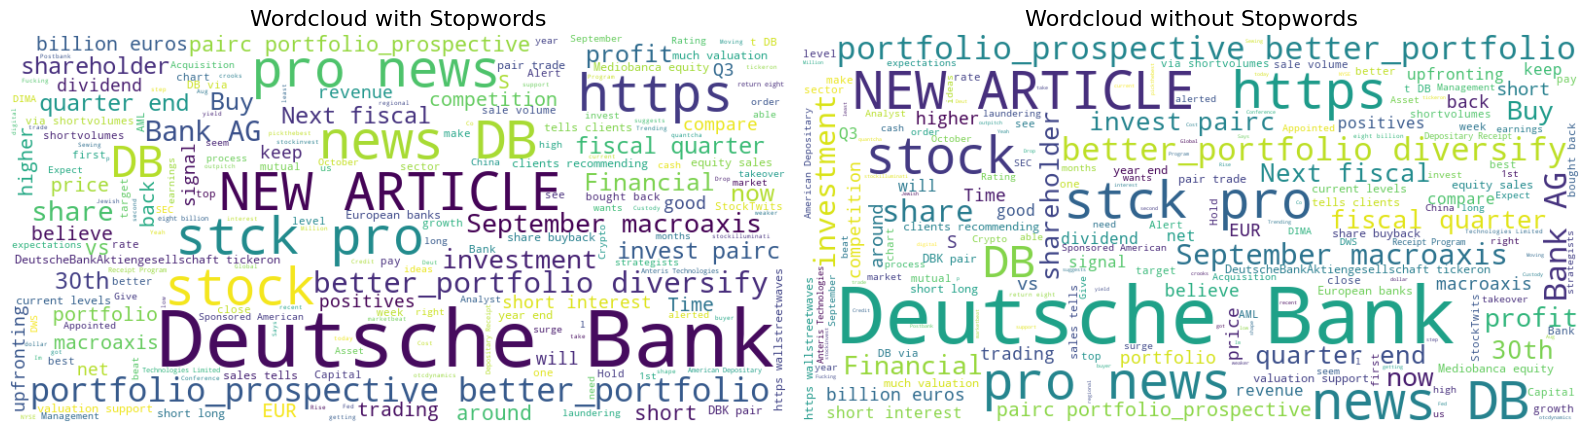

In [420]:
# Textdaten aus der Spalte 'body_cleaned' extrahieren
text = " ".join(df_tweets['body_cleaned'])

# Wordcloud mit Stoppwörtern
wordcloud_with_stopwords = WordCloud(
    width=800,
    height=400,
    stopwords=STOPWORDS,  # Standard-Stoppwörter
    background_color='white'
).generate(text)

# Wordcloud ohne Stoppwörter
wordcloud_without_stopwords = WordCloud(
    width=800,
    height=400,
    stopwords=None,  # Keine Stoppwörter entfernen
    background_color='white'
).generate(text)

# Visualisierung der Wordclouds
plt.figure(figsize=(16, 8))

# Wordcloud mit Stoppwörtern
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_with_stopwords, interpolation='bilinear')
plt.title('Wordcloud with Stopwords', fontsize=16)
plt.axis('off')

# Wordcloud ohne Stoppwörter
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_without_stopwords, interpolation='bilinear')
plt.title('Wordcloud without Stopwords', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

Wörter wie "invest, profit, growth, short, long, hold, higher" verdeutlichen die Investment getriebenen Meinungaußerungen der User. 